##Experiment on Indian Currency Notes Classification.

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D

import numpy as np
from glob import glob

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Datasets/Train'
valid_path = '/content/drive/MyDrive/Datasets/Test'

In [ ]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Datasets/Train/*')

In [ ]:
folders

['../input/indian-currency-notes-classifier/Train/Fiftynote',
 '../input/indian-currency-notes-classifier/Train/2Thousandnote',
 '../input/indian-currency-notes-classifier/Train/5Hundrednote',
 '../input/indian-currency-notes-classifier/Train/2Hundrednote',
 '../input/indian-currency-notes-classifier/Train/Twentynote',
 '../input/indian-currency-notes-classifier/Train/1Hundrednote',
 '../input/indian-currency-notes-classifier/Train/Tennote']

In [ ]:
Classifier=Sequential()

Classifier.add(Conv2D(32,(3,3), input_shape=(224,224,3), activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))

Classifier.add(Conv2D(32,(3,3),activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))

Classifier.add(Flatten())

Classifier.add(Dense(units = 128, activation = 'relu'))
Classifier.add(Dense(units = 7, activation = 'softmax'))

In [ ]:
# tell the model what cost and optimization method to use
Classifier.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   height_shift_range=0.2,
                                   featurewise_center=True,
                                   rotation_range=0.4,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255,)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 153 images belonging to 7 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 42 images belonging to 7 classes.


In [ ]:
# fit the model
from PIL import _imaging
from PIL import Image
import PIL
# Run the cell. It will take some time to execute
r = Classifier.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50
5/5 [==============================] - 9s 2s/step - loss: 12.3755 - accuracy: 0.1111 - val_loss: 3.4755 - val_accuracy: 0.1429


/opt/conda/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:780: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


Epoch 2/50
5/5 [==============================] - 9s 2s/step - loss: 2.4163 - accuracy: 0.1242 - val_loss: 2.0257 - val_accuracy: 0.1429
Epoch 3/50
5/5 [==============================] - 9s 2s/step - loss: 1.9783 - accuracy: 0.1569 - val_loss: 1.9747 - val_accuracy: 0.1429
Epoch 4/50
5/5 [==============================] - 8s 2s/step - loss: 1.9457 - accuracy: 0.2026 - val_loss: 1.9290 - val_accuracy: 0.1429
Epoch 5/50
5/5 [==============================] - 9s 2s/step - loss: 1.9012 - accuracy: 0.1895 - val_loss: 1.8970 - val_accuracy: 0.1429
Epoch 6/50
5/5 [==============================] - 8s 2s/step - loss: 1.8401 - accuracy: 0.1961 - val_loss: 1.8598 - val_accuracy: 0.1667
Epoch 7/50
5/5 [==============================] - 9s 2s/step - loss: 1.7934 - accuracy: 0.2288 - val_loss: 1.7503 - val_accuracy: 0.3095
Epoch 8/50
5/5 [==============================] - 10s 2s/step - loss: 1.6307 - accuracy: 0.3725 - val_loss: 1.5190 - val_accuracy: 0.3095
Epoch 9/50
5/5 [========================

In [ ]:
r.history

{'loss': [12.375466346740723,
  2.4162890911102295,
  1.9783377647399902,
  1.945702075958252,
  1.9011633396148682,
  1.8401094675064087,
  1.7934226989746094,
  1.6306686401367188,
  1.574686884880066,
  1.5512059926986694,
  1.461974859237671,
  1.2797890901565552,
  1.0245695114135742,
  0.8878782391548157,
  0.9401155114173889,
  0.9390382170677185,
  0.7805585861206055,
  0.7015202641487122,
  0.7600943446159363,
  0.7726573348045349,
  0.6140623688697815,
  0.4180101752281189,
  0.36972683668136597,
  0.3986680805683136,
  0.34232330322265625,
  0.27631640434265137,
  0.2305949628353119,
  0.22614048421382904,
  0.24893559515476227,
  0.2044418454170227,
  0.17135313153266907,
  0.15846958756446838,
  0.17333638668060303,
  0.12389878928661346,
  0.09684313088655472,
  0.09429515898227692,
  0.061517134308815,
  0.0782405287027359,
  0.08576235175132751,
  0.05454704910516739,
  0.04463458061218262,
  0.05486634746193886,
  0.034861307591199875,
  0.05490732565522194,
  0.083019

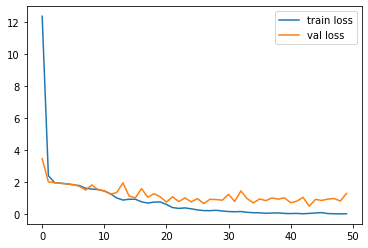

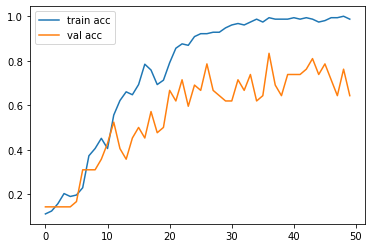

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

Classifier.save('model_Classifier.h5')

In [ ]:
y_pred = Classifier.predict(test_set)

In [ ]:
y_pred

array([[9.99997377e-01, 2.08926944e-14, 2.40428744e-08, 2.87923939e-07,
        2.34295248e-06, 1.90097516e-09, 8.58323357e-10],
       [1.64665837e-10, 4.11903998e-03, 7.92120208e-14, 6.96848903e-04,
        3.04524528e-05, 6.26577318e-01, 3.68576318e-01],
       [3.88471037e-01, 1.15228694e-07, 5.42532028e-08, 5.08216843e-02,
        5.60666203e-01, 4.13746693e-06, 3.66866152e-05],
       [7.56404042e-01, 1.39529566e-05, 2.41824895e-01, 3.54274016e-05,
        1.13952803e-04, 1.59283355e-03, 1.48070221e-05],
       [1.08184083e-03, 7.65101049e-06, 4.00410681e-06, 5.69001213e-06,
        1.52915344e-03, 3.86225665e-08, 9.97371554e-01],
       [4.33916831e-03, 2.98210551e-07, 9.95659649e-01, 4.29936833e-08,
        1.13266463e-09, 3.83289915e-07, 4.23224293e-07],
       [9.94791031e-01, 2.64469315e-11, 5.16301440e-03, 4.96605814e-08,
        4.59861876e-05, 8.40225722e-10, 1.96440126e-08],
       [4.46767430e-04, 1.08920121e-11, 8.66011352e-09, 7.48002349e-05,
        9.99478400e-01, 1

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([0, 5, 4, 0, 6, 2, 0, 4, 4, 2, 2, 5, 0, 6, 0, 1, 1, 3, 6, 6, 2, 5,
       6, 6, 4, 6, 4, 4, 4, 1, 5, 2, 1, 4, 4, 4, 6, 4, 1, 6, 1, 4])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_Classifier.h5')

In [ ]:
img=image.load_img('/content/drive/MyDrive/Datasets/Test/1Hundrednote/1.jpg',target_size=(224,224))

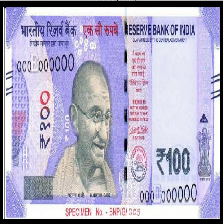

In [ ]:
img

In [ ]:
test_image=image.img_to_array(img)
test_image=np.expand_dims(test_image, axis = 0)

In [ ]:
result = Classifier.predict(test_image)
result

array([[1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(test_image), axis=1)

In [ ]:
a==5

array([False])

In [ ]:
a==0

array([ True])